## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [8]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
result_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
result_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sun, 29 Mar 2020   AIC                          55215.333
Time:                        09:23:45   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5654      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of the ARIMA(1,1,1)

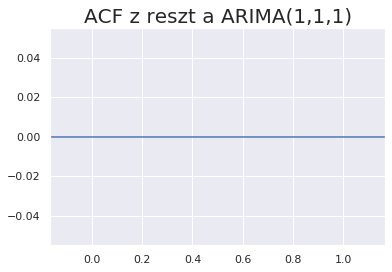

In [9]:
df['res_ar_1_i_1_ma_1'] = result_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero=False, lags=40)
plt.title('ACF z reszt a ARIMA(1,1,1)', size=20);

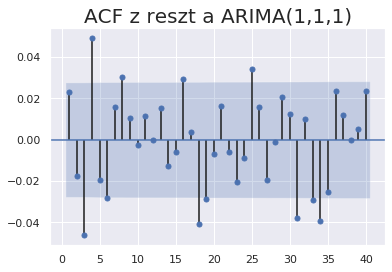

In [10]:
df['res_ar_1_i_1_ma_1'] = result_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF z reszt a ARIMA(1,1,1)', size=20);

## Higher-Lag ARIMA Models

In [11]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
result_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
result_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
result_ar_2_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
result_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
result_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags = 5)

In [12]:
print('ARIMA(1,1,1): \t LL = ', result_ar_1_i_1_ma_1.llf, '\t AIC = ', result_ar_1_i_1_ma_1.aic)
print('ARIMA(1,1,2): \t LL = ', result_ar_1_i_1_ma_2.llf, '\t AIC = ', result_ar_1_i_1_ma_2.aic)
print('ARIMA(1,1,3): \t LL = ', result_ar_1_i_1_ma_3.llf, '\t AIC = ', result_ar_1_i_1_ma_3.aic)
print('ARIMA(2,1,1): \t LL = ', result_ar_2_i_1_ma_1.llf, '\t AIC = ', result_ar_2_i_1_ma_1.aic)
print('ARIMA(3,1,1): \t LL = ', result_ar_3_i_1_ma_1.llf, '\t AIC = ', result_ar_3_i_1_ma_1.aic)
print('ARIMA(3,1,2): \t LL = ', result_ar_3_i_1_ma_2.llf, '\t AIC = ', result_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1): 	 LL =  -27603.666412779603 	 AIC =  55215.332825559206
ARIMA(1,1,2): 	 LL =  -27600.08186312661 	 AIC =  55210.16372625322
ARIMA(1,1,3): 	 LL =  -27590.424032578812 	 AIC =  55192.848065157625
ARIMA(2,1,1): 	 LL =  -27603.666412779603 	 AIC =  55215.332825559206
ARIMA(3,1,1): 	 LL =  -27592.05537170828 	 AIC =  55196.11074341656
ARIMA(3,1,2): 	 LL =  -27590.660808971617 	 AIC =  55195.321617943235


Wybieramy ARIMA(1,1,3)

In [13]:
print('\nLLR test p-value = ' + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)))


LLR test p-value = 0.0


In [14]:
print('\nLLR test p-value = ' + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF=2)))


LLR test p-value = 0.0


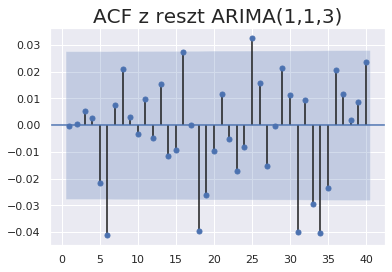

In [15]:
df['res_ar_1_i_1_ma_3'] = result_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero=False, lags=40)
plt.title('ACF z reszt ARIMA(1,1,3)', size=20);

In [16]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
result_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)

model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
result_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

In [17]:
print('ARIMA(1,1,3): \t LL = ', result_ar_1_i_1_ma_3.llf, '\t AIC = ', result_ar_1_i_1_ma_3.aic)
print('ARIMA(5,1,1): \t LL = ', result_ar_5_i_1_ma_1.llf, '\t AIC = ', result_ar_5_i_1_ma_1.aic)
print('ARIMA(6,1,3): \t LL = ', result_ar_6_i_1_ma_3.llf, '\t AIC = ', result_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3): 	 LL =  -27590.424032578812 	 AIC =  55192.848065157625
ARIMA(5,1,1): 	 LL =  -27586.51188966997 	 AIC =  55189.02377933994
ARIMA(6,1,3): 	 LL =  -27583.565320410773 	 AIC =  55189.130640821546


In [18]:
print('\nLLR test p-value = ' + str(LLR_test(model_ar_1_i_1_ma_3, model_ar_6_i_1_ma_3, DF=5)))


LLR test p-value = 0.018


In [19]:
print('\nLLR test p-value = ' + str(LLR_test(model_ar_5_i_1_ma_1, model_ar_6_i_1_ma_3, DF=3)))


LLR test p-value = 0.117


Wybieramy ARIMA(5,1,1)

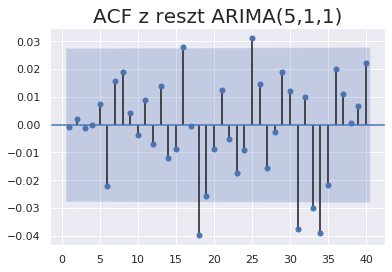

In [20]:
df['res_ar_5_i_1_ma_1'] = result_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF z reszt ARIMA(5,1,1)', size=20);

## Models with Higher Levels of Integration

In [21]:
df['delta_prices'] = df.market_value.diff(1)

In [22]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
result_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
result_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sun, 29 Mar 2020   AIC                          55215.333
Time:                        09:39:53   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5654      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
result_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
result_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sun, 29 Mar 2020   AIC                          55215.333
Time:                        09:40:11   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5654      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
sts.adfuller(df.delta_prices[1:])

(-32.244093495707446,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.961042218914)

## ARIMAX 

In [25]:
df.head()

spx      dax     ftse    nikkei  market_value   returns  \
date                                                                     
1994-01-07  469.90  2224.95  3445.98  18124.01       3445.98       NaN   
1994-01-10  475.27  2225.00  3440.58  18443.44       3440.58 -0.156704   
1994-01-11  474.13  2228.10  3413.77  18485.25       3413.77 -0.779229   
1994-01-12  474.17  2182.06  3372.02  18793.88       3372.02 -1.222988   
1994-01-13  472.47  2142.37  3360.01  18577.26       3360.01 -0.356166   

            res_ar_1_i_1_ma_1  res_ar_1_i_1_ma_3  res_ar_5_i_1_ma_1  \
date                                                                  
1994-01-07                NaN                NaN                NaN   
1994-01-10          -5.965413          -5.965278          -5.967489   
1994-01-11         -27.627760         -27.477734         -27.485286   
1994-01-12         -43.711858         -43.110941         -43.133876   
1994-01-13         -15.568997         -15.438121         -15.375602   

            delta_prices  
date                      
1994-01-07           NaN  
1994-01-10         -5.40  
1994-01-11        -26.81  
1994-01-12        -41.75  
1994-01-13        -12.01

In [26]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, order=(1,1,1),exog=df['spx'])
result_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
result_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Sun, 29 Mar 2020   AIC                          55217.112
Time:                        09:54:23   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5874      2.655     -0.221      0.825      -5.792       4.617
spx                      0.0011      0.002      0.451      0.652      -0.004       0.006
ar.L1.D.market_value     0.7456      0.070     10.577      0.000       0.607       0.884
ma.L1.D.market_value    -0.7917      0.065    -12.273      0.000      -0.918      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3412           +0.0000j            1.3412            0.0000
MA.1            1.2632           +0.0000j            1.2632            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
model_ar_1_i_1_ma_1_Xdax = ARIMA(df.market_value, order=(1,1,1),exog=df.dax)
result_ar_1_i_1_ma_1_Xdax = model_ar_1_i_1_ma_1_Xdax.fit()
result_ar_1_i_1_ma_1_Xdax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.662
Method:                       css-mle   S.D. of innovations             59.133
Date:                Sun, 29 Mar 2020   AIC                          55217.323
Time:                        09:57:09   BIC                          55249.929
Sample:                    01-10-1994   HQIC                         55228.749
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7988      2.107      0.379      0.705      -3.331       4.928
dax                  -4.603e-05      0.000     -0.115      0.908      -0.001       0.001
ar.L1.D.market_value     0.7474      0.070     10.634      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.352      0.000      -0.920      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3380           +0.0000j            1.3380            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
model_sarimax = SARIMAX(df.market_value, order=(1,0,1),exog=df['spx'], seasonal_order=(2,0,1,5))
result_sarimax = model_sarimax.fit()
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.680
Date:                           Sun, 29 Mar 2020   AIC                          53439.359
Time:                                   10:04:56   BIC                          53485.009
Sample:                               01-07-1994   HQIC                         53455.355
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7036      0.035     76.213      0.000       2.634       2.773
ar.L1          0.9998      0.000   2170.461      0.000       0.999       1.001
ma.L1         -0.3099      0.009    -32.786      0.000      -0.328      -0.291
ar.S.L5        0.9653      0.011     86.786      0.000       0.943       0.987
ar.S.L10       0.0344      0.010      3.316      0.001       0.014       0.055
ma.S.L5       -0.9987      0.006   -174.604      0.000      -1.010      -0.987
sigma2      2444.1183     28.523     85.688      0.000    2388.213    2500.023
===================================================================================
Ljung-Box (Q):                       95.46   Jarque-Bera (JB):              4210.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""